In [2]:
# required Python imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.spatial.transform import Rotation as r

In [18]:
# define some neccesary funtions
def sph2cart(phi, theta, T):
    """ Convert from spherical/polar (phi, thetha) to cartesian
    coordinates.

    Parameters
    ----------
    phi : int or float between 0 and pi/2
        angle respect to the c-axis in radians
    theta : int or float between 0 and 2*pi
        angle respect to the a-axis in radians
    T : int or float
        the magnitud of the vector (rho) in polar coordinates

    Returns
    -------
    numpy ndarrays (1d)
        three numpy 1d arrays with the x, y, and z coordinates
    """
    
    x = T * np.sin(phi) * np.cos(theta)
    y = T * np.sin(phi) * np.sin(theta)
    z = T * np.cos(phi)
    
    return x, y, z


def Tvalues(trans, phi, theta):
    """ Calculates the transmission value for any direction in polar
    coordinates using the equation (5) of Asimov et al. (2006) for a
    especific wavelength ignoring the sample thickness (i.e. =1).

    Parameters
    ----------
    trans : a tuple of size 3
        tuple containeing the transmission values along a-axis (Ta),
        b-axis (Tb), and c-axis (Tc). -> (Ta, Tb, Tc)
    phi : int or float between 0 and pi/2
        angle respect to the c-axis in radians
    theta : int or float between 0 and 2*pi
        angle respect to the a-axis in radians

    Returns
    -------
    numpy array
        the calculated T values for any given orientation
    """

    # extract Tx values
    Ta, Tb, Tc = trans
    
    return Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
           Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
           Tc * np.cos(phi)**2

def rotate(coordinates, euler_ang):
    """ Rotate points in 3D cartesian space using the Bunge convention
    in degrees with intrinsic rotation. This is just a wrapper for the
    r.from_euler() Scipy method for convenience

    Parameters
    ----------
    coordinates : tuple of size 3
        a tuple containing the cartesian coordinates of this form:
        (x, y, z). variables x, y and z can be scalars or arrays.
    euler_ang : tuple of size 3
        a tuple containing the three euler angles in degrees
        using Bunge convention -> (z, x, z)

    Returns
    -------
    three numpy arrays containing the x, y, z coordinates respectively
    
    Example
    -------
    x, y, z = rotate(coordinates=(x, y, z), euler_ang=(30, 0, 40))
    """

    # create a ndarray to vectorize the rotation operation
    coordinates = np.dstack(coordinates)

    phi1, PHI, phi2 = euler_ang

    # define a rotation in euler space (Bunge) for intrinsic rotations
    rotation = r.from_euler('zxz', [phi1, PHI, phi2], degrees=True)

    # apply rotation
    new_coordinates = coordinates @ rotation.as_matrix().T

    return new_coordinates[:,:,0], new_coordinates[:,:,1], new_coordinates[:,:,2]
    

NameError: name 'coordinates' is not defined

## Minimization Trial using Tmax, Tmin and beta 

I am going to try to get first these values (that i think are unique for a given rotation) and then try to use them to minimize the function

In [4]:
# generate a mesh of spherical/polar coordinates
theta = np.linspace(0, 2*np.pi, 100)
phi = np.arccos(1 - 2 * np.linspace(0, 1, 100))  # in this case np.linspace goes from 0 to 1 (not pi)!
phi, theta = np.meshgrid(phi, theta)

# estimate T values
T = Tvalues(trans=(90, 50, 20), phi=phi, theta=theta)

# convert from spherical to cartesian coordinates
x, y, z = sph2cart(phi, theta, T)

The following function finds the max, min values of T in the horizontal section and the angle relative to the "East" and the maximum T_section

In [5]:
def parm_section(euler_ang):
    """ section_xy is generated using ax.contour and z = 0, i.e. [0]
    matplotlib.contour.QuadContourSet
    
    section_xy = ax.contour(rotation[0], rotation[1], rotation[2], [0])
    """ 

    rotation = rotate(coordinates=(x, y, z), euler_ang=(phi1, PHI, phi2))
    section_xy = plt.contour(rotation[0], rotation[1], rotation[2], [0])

    T_xy = section_xy.allsegs[0]
    T_xy = T_xy[0]
    T_section = np.sqrt(T_xy[:,0]**2 + T_xy[:,1]**2)
    T_section = T_section.round()
    
    index_T = np.where(T_section == T_section.max())
    T_xy[index_T[0],:]
    beta = np.arccos(T_xy[index_T[0][0],0]/T_section.max())
    beta = np.degrees(beta)
    beta
    
    T_section_max = T_section.max()
    T_section_min = T_section.min()
    
    return beta.round(), T_section_max, T_section_min

# Minimization 
Minimizatio of a function (g) that compares the "observerd" T_section and the one that is produced by a rotation using euler_ang 


In [6]:
from scipy.optimize import minimize

array([12., 90., 50.])

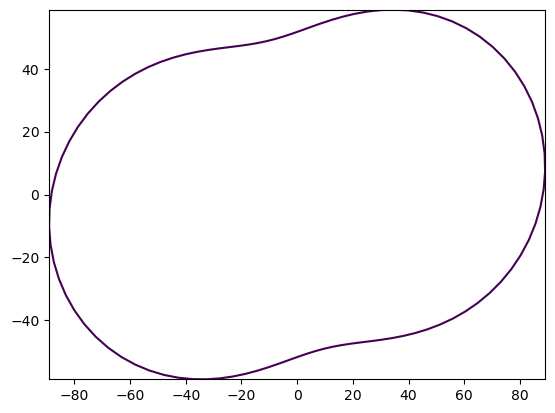

In [56]:
phi1_, PHI_, phi2_ = 12, 0, 0
T_measured = np.array(parm_section(phi1_, PHI_, phi2_))
T_measured 

## objective function 

In [8]:
def g(euler_ang):
    phi1, PHI, phi2 = euler_ang
    section = parm_section(phi1, PHI, phi2)
    beta_error = (T_measured[0] - section[0])**2
    Tmax_error = (T_measured[1] - section[1])**2
    Tmin_error = (T_measured[2] - section[2])**2
    return beta_error + Tmax_error + Tmin_error

In [7]:
def G(phi1, PHI, phi2):
    section = parm_section(phi1, PHI, phi2)
    beta_error = (T_measured[0] - section[0])**2
    Tmax_error = (T_measured[1] - section[1])**2
    Tmin_error = (T_measured[2] - section[2])**2
    return beta_error + Tmax_error + Tmin_error

In [9]:
phi1__ = np.linspace(0, 180, 100)
PHI__  = np.linspace(0, 90, 100)
phi2__ = np.linspace(0, 180, 100)

NameError: name 'phi1' is not defined

In [19]:
G(phi1__, PHI__, phi2__)

ValueError: Expected `angles` to be at most 2-dimensional with width equal to number of axes specified, got (3, 100) for shape

In [78]:
d = np.array([1, 2, 3])
hu(d)


array([3, 4, 5])

ValueError: Expected `angles` to be at most 2-dimensional with width equal to number of axes specified, got (3, 100) for shape

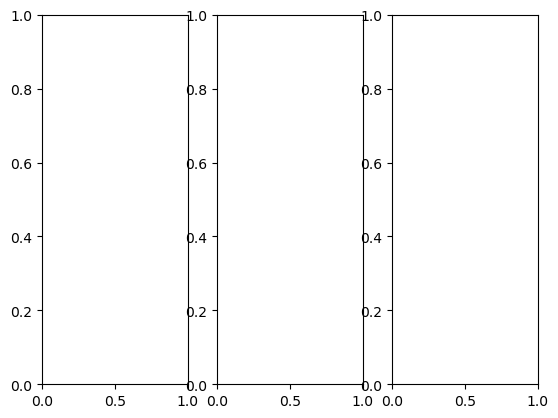

In [31]:
fig, axes = plt.subplots(1, 3)
axes[0].contour(phi1_, PHI_, G(phi1_, PHI_, phi2_))

array([1., 1., 1.])

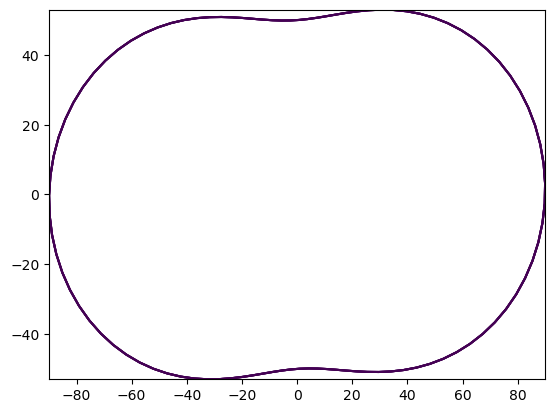

In [26]:
initial_guess = [1, 1, 1]
res = minimize(g, initial_guess)
res.x